# Imports

In [1]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt
import os

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [2]:
n = 5 # 5 increase n 
label_name = "stat4"
layers = [2] #[7, 2]

epochs = 1000 # increase epochs until curve flattens
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 64

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [3]:
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [4]:
os.makedirs('models', exist_ok=True)
for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")

Epoch 0, Loss 1.5189300179481506
Epoch 1, Loss 1.5271950364112854
Epoch 2, Loss 1.499302864074707
Epoch 3, Loss 1.5169814229011536
Epoch 4, Loss 1.5179000496864319
Epoch 5, Loss 1.5288212895393372
Epoch 6, Loss 1.5316504836082458
Epoch 7, Loss 1.4898078441619873
Epoch 8, Loss 1.4910049438476562
Epoch 9, Loss 1.5335859060287476
Epoch 10, Loss 1.5057989954948425
Epoch 11, Loss 1.5062909126281738
Epoch 12, Loss 1.4759588837623596
Epoch 13, Loss 1.468043863773346
Epoch 14, Loss 1.4830594062805176
Epoch 15, Loss 1.4877634644508362
Epoch 16, Loss 1.4624205827713013
Epoch 17, Loss 1.4749048352241516
Epoch 18, Loss 1.4617834687232971
Epoch 19, Loss 1.4704222679138184
Epoch 20, Loss 1.4461256861686707
Epoch 21, Loss 1.4586807489395142
Epoch 22, Loss 1.4387755990028381
Epoch 23, Loss 1.4392701387405396
Epoch 24, Loss 1.4333330988883972
Epoch 25, Loss 1.4423657059669495
Epoch 26, Loss 1.4497920274734497
Epoch 27, Loss 1.4298678636550903
Epoch 28, Loss 1.4253613352775574
Epoch 29, Loss 1.408314824

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

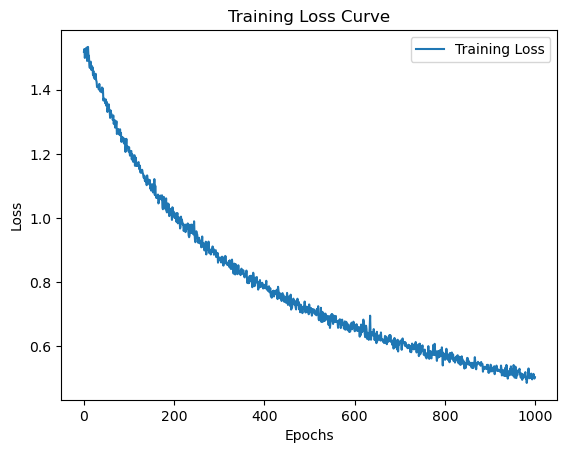

In [5]:
# Create directory for saving figures if it doesn't exist
os.makedirs('figures', exist_ok=True)
# Plot and save the loss curve
plt.figure()
plt.plot(range(epochs), losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.savefig(f'figures/{label_name}_loss_curve.png')
plt.show()

# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

[[60, 0], [0, 36]]
Accuracy for class 0 = 100.0%
Accuracy for class 1 = 100.0%
Overall accuracy = 100.0%


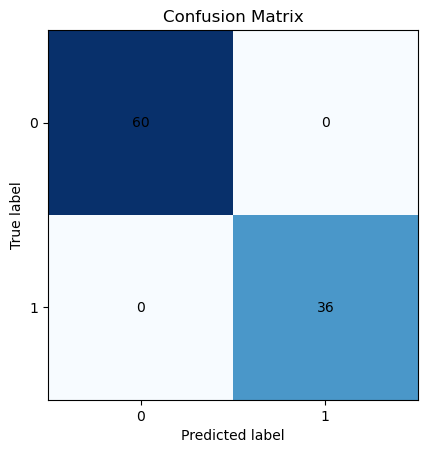

In [6]:
confusion_matrix = evaluate_model(model, training_dataset)
print(confusion_matrix)
confusion_matrix.print_accuracy()
confusion_matrix.plot()

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

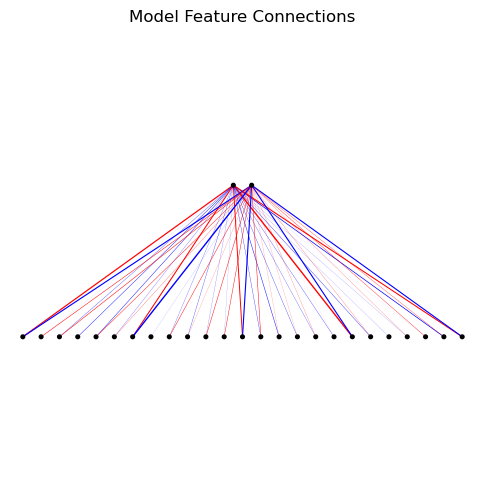

In [7]:
model.plot_connections()

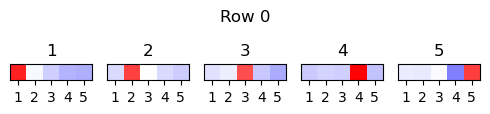

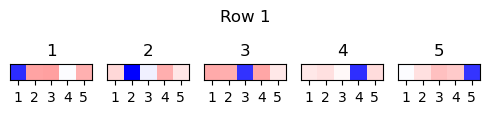

In [8]:
model.plot_heatmap_feature(0,0)
model.plot_heatmap_feature(0,1)

In [9]:
#model.plot_heatmap_feature(1,0)
#model.plot_heatmap_feature(1,1)

#model.plot_heatmap_feature(0,4)

In [27]:

import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text

# Load the original dataset
file_path = f"data/permutations_{n}.csv"  # Update the path accordingly
df = pd.read_csv(file_path)

# Convert permutations to individual digits
def permutation_to_features(permutation):
    return [int(x) for x in permutation.strip("()").split(", ")]

# Apply the conversion to the dataset
X = df['permutation'].apply(permutation_to_features).tolist()
y = df['stat4']

# Train a decision tree classifier
clf = DecisionTreeClassifier(max_depth=5)  # Adjust max_depth as needed
clf.fit(X, y)

# Extract rules from the decision tree
tree_rules = export_text(clf, feature_names=[f'pos_{i+1}' for i in range(len(X[0]))])
print(tree_rules)

|--- pos_5 <= 4.50
|   |--- pos_1 <= 1.50
|   |   |--- class: 0
|   |--- pos_1 >  1.50
|   |   |--- pos_2 <= 2.50
|   |   |   |--- pos_2 <= 1.50
|   |   |   |   |--- pos_4 <= 3.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- pos_4 >  3.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- pos_2 >  1.50
|   |   |   |   |--- class: 0
|   |   |--- pos_2 >  2.50
|   |   |   |--- pos_4 <= 3.50
|   |   |   |   |--- pos_3 <= 2.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- pos_3 >  2.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- pos_4 >  3.50
|   |   |   |   |--- pos_4 <= 4.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- pos_4 >  4.50
|   |   |   |   |   |--- class: 1
|--- pos_5 >  4.50
|   |--- class: 0



In [35]:
import pandas as pd

# Load the original dataset
file_path = f"data/permutations_{n}.csv"  # Update the path accordingly
df = pd.read_csv(file_path)

# Function to check the decision tree rules for stat4
def decision_tree_stat4(permutation):
    digits = [int(x) for x in permutation.strip("()").split(", ")]
    
    # Decision tree rules
    if digits[0] <= 1:
        return 0
    else:
        if digits[4] <= 4:
            if digits[1] <= 2:
                if digits[1] <= 1:
                    if digits[3] <= 3:
                        return 1
                    else:
                        return 0
                else:
                    return 0
            else:
                if digits[3] <= 3:
                    if digits[2] <= 2:
                        return 1
                    else:
                        return 1
                else:
                    if digits[3] <= 4:
                        return 0
                    else:
                        return 1
        else:
            return 0

# Apply the decision tree rules to compute stat4
df['computed_stat4'] = df['permutation'].apply(decision_tree_stat4)

# Check if the decision tree rules are correct
accuracy_stat4 = (df['stat4'] == df['computed_stat4']).mean()

# Print the accuracy and mismatched data
print(f"Accuracy for stat4: {accuracy_stat4 * 100}%")
mismatched_data = df[df['stat4'] != df['computed_stat4']]
print(mismatched_data[['permutation', 'stat4', 'computed_stat4']])


Accuracy for stat4: 90.83333333333333%
         permutation  stat4  computed_stat4
27   (2, 1, 4, 5, 3)      1               0
39   (2, 4, 3, 5, 1)      0               1
44   (2, 5, 3, 1, 4)      0               1
49   (3, 1, 2, 5, 4)      1               0
51   (3, 1, 4, 5, 2)      1               0
73   (4, 1, 2, 5, 3)      1               0
94   (4, 5, 3, 1, 2)      0               1
95   (4, 5, 3, 2, 1)      0               1
98   (5, 1, 3, 2, 4)      0               1
118  (5, 4, 3, 1, 2)      0               1
119  (5, 4, 3, 2, 1)      0               1
